In [1]:

import os, glob, shutil
import urllib.request as r

def data_yuklab_olish(saqlash_uchun_papka, data_nomi = "salaries"): 
    
    data_nomlari = ["salaries", "exams", "college", "cars", "mall", "customers", "humanitarian"]
    assert data_nomi in data_nomlari, f"Mavjud bo'lgan dataset {data_nomlari} dan birini kiriting!"
    
    if data_nomi == "college": url = "https://drive.google.com/file/d/1vwfMpQ4ikAI91zn1bWxP_Iqz7DTFUA9F/view?usp=sharing"
    elif data_nomi == "salaries": url = "https://drive.google.com/file/d/1p-XtX29fgXT9CzBfpHm3t8r028gQPRhe/view?usp=sharing"
    elif data_nomi == "exams": url = "https://drive.google.com/file/d/1TYN_sRmauaDgNYgQ-0VSHVAJvLoxKx2R/view?usp=sharing"
    elif data_nomi == "cars": url = "https://drive.google.com/file/d/1Fi5IPdfEktnKyf3dyHmnh84a2jiXl33A/view?usp=sharing"
    elif data_nomi == "mall": url = "https://drive.google.com/file/d/1eGWJVRNmGjfaH0o3dczBbNe_-RrW0_Jm/view?usp=sharing"
    elif data_nomi == "customers": url = "https://drive.google.com/file/d/1kW9UY7LI7kbnM5z2jgCMBUPUUMbsPe6p/view?usp=sharing"
    elif data_nomi == "humanitarian": url = "https://drive.google.com/file/d/1dRv0-5iflumJFcjSHk-Vnjedtsn0WEEQ/view?usp=sharing"
    
    full_path = f"{saqlash_uchun_papka}/{data_nomi}.zip"
    os.makedirs(saqlash_uchun_papka, exist_ok = True)

    # Download from the checkpoint path
    if os.path.isfile(f"{saqlash_uchun_papka}/{data_nomi}.csv"): print("Data yuklab olingan"); pass

    # If the checkpoint does not exist
    else: 
        print("Datani yuklash boshlanmoqda...")

        # Get file id
        file_id = url.split("/")[-2]

        # Initialize prefix to download
        prefix = "https://drive.google.com/uc?/export=download&id="

        # Download the checkpoint
        r.urlretrieve(f"{prefix + file_id}", f"{full_path}")
        shutil.unpack_archive(f"{full_path}", f"{saqlash_uchun_papka}")
        os.remove(full_path)

        files = sorted(glob.glob(f"{saqlash_uchun_papka}/*"), key = os.path.getctime)
        fname = os.path.basename(files[-1])
        os.rename(f"{saqlash_uchun_papka}/{fname}", f"{saqlash_uchun_papka}/{data_nomi}.csv")
        print(f"Data {saqlash_uchun_papka} papkasiga {data_nomi} nomi bilan yuklab olindi.")
        
data_yuklab_olish(saqlash_uchun_papka = "data", data_nomi = "customers")
data_yuklab_olish(saqlash_uchun_papka = "data", data_nomi = "humanitarian")


Datani yuklash boshlanmoqda...
Data data papkasiga customers nomi bilan yuklab olindi.
Datani yuklash boshlanmoqda...
Data data papkasiga humanitarian nomi bilan yuklab olindi.


In [5]:
import pandas as pd
data = pd.read_csv("data/customers.csv")
data.head(10)



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [25]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [24]:
len(data)

2240

In [31]:
column_names = data.columns
print(column_names)


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [22]:
data.shape

(2240, 29)

In [37]:
def clean_data(data, column_names, threshold = 10):
    for column_name in column_names:
        titles = list(data[column_name])
        di = {}

        for title in titles:
            if title not in di:
                di[title] = 1
            else:
                di[title] += 1

        li = [key for (key, value) in di.items() if value < threshold]

        print(li)
        for name in li:
             mask = data[column_name] == name
             data = data[~mask]

    return data

column_names = ['Income', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

data_cleaned = clean_data(data = data, column_names = column_names)
print(len(data_cleaned))
print(len(data))


[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, nan, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, nan, 79941.0, 41728.0, nan, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, nan, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, nan, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, nan, nan, nan, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, 68126.0, 57288.0, 86037.0, 43974.0, 50785.0, 90765.0, 36550.0, 30753.0, 21

C:\Users\madam\AppData\Local\Temp\ipykernel_11684\2180152743.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 60)


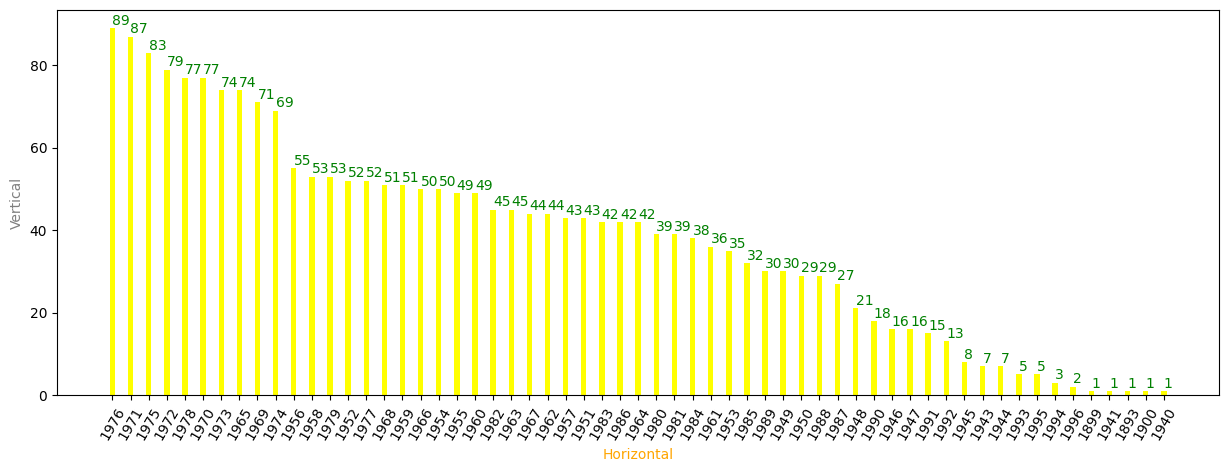

In [19]:
from matplotlib import pyplot as plt
import numpy as np

def data_analysis(df, column_name, color,text_height = 0.02, text_width = 0.05):
    counts = df[column_name].value_counts().values 
    cls_names = df[column_name].value_counts().keys()
    width, text_width, text_height = 0.3, text_width , 0.8
    fig, ax = plt.subplots(figsize = (15,5))
    indices = np.arange(len(counts))

    ax.bar(indices, counts, width, color = color)
    ax.set_xlabel("Horizontal", color = "orange")
    ax.set_xticklabels(cls_names, rotation = 60)
    ax.set(xticks = indices, xticklabels = cls_names)
    ax.set_ylabel('Vertical', color = 'grey')

    for i, v in enumerate(counts):  ax.text(i - text_width, v + text_height, str(v), color = "green")

data_analysis(df = data, column_name = "Year_Birth", color = "yellow", text_width = 0.005)

C:\Users\madam\AppData\Local\Temp\ipykernel_11684\2180152743.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 60)


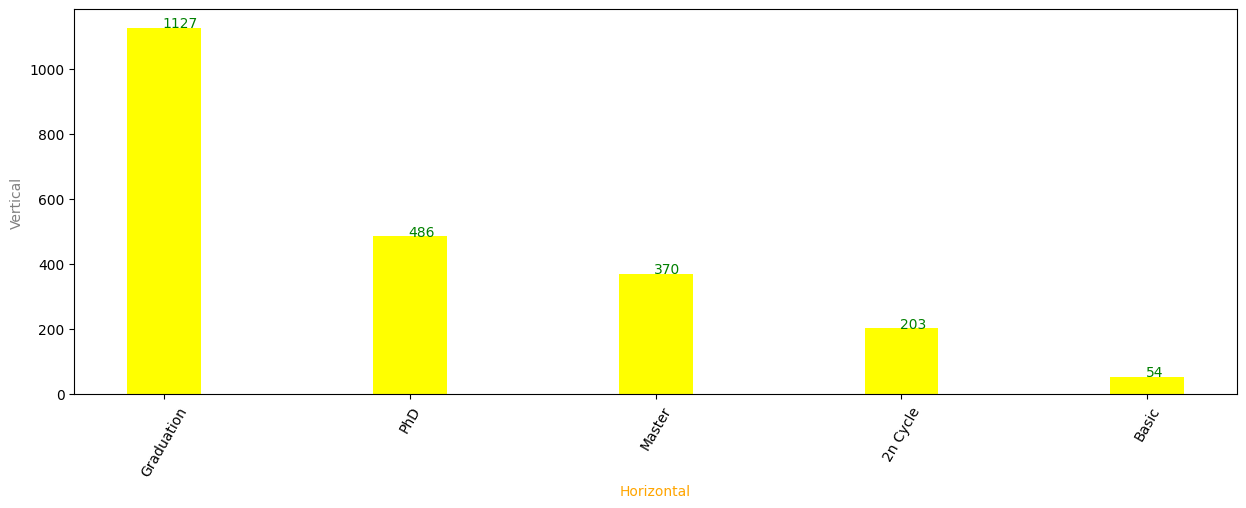

In [21]:
data_analysis(df = data, column_name = "Education", color = "yellow", text_width = 0.005)

In [38]:
x = data.drop(['Kidhome',
       'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], axis = 1)
x

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency
0,5524,1957,Graduation,Single,58138.0,04-09-2012,58
1,2174,1954,Graduation,Single,46344.0,08-03-2014,38
2,4141,1965,Graduation,Together,71613.0,21-08-2013,26
3,6182,1984,Graduation,Together,26646.0,10-02-2014,26
4,5324,1981,PhD,Married,58293.0,19-01-2014,94
...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,13-06-2013,46
2236,4001,1946,PhD,Together,64014.0,10-06-2014,56
2237,7270,1981,Graduation,Divorced,56981.0,25-01-2014,91
2238,8235,1956,Master,Together,69245.0,24-01-2014,8


In [43]:
X = data.iloc[:,[0,8]].values
X[:5]

array([[5524,   58],
       [2174,   38],
       [4141,   26],
       [6182,   26],
       [5324,   94]], dtype=int64)

In [46]:
from sklearn.cluster import KMeans

In [48]:
inertias = []
for number_clusters in range(1, 11):
    km = KMeans(n_clusters = number_clusters)
    km.fit_predict(X)
    inertias.append(km.inertia_)
    

Text(0.5, 1.0, 'Elbow - Method')

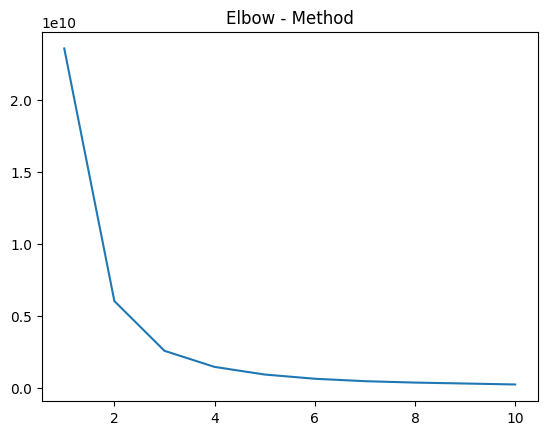

In [51]:
from matplotlib import pyplot as plt
plt.plot(range(1, 11), inertias)
plt.title("Elbow - Method")

In [54]:
km = KMeans(n_clusters = 3)
y_means = km.fit_predict(X)
y_means

array([0, 2, 0, ..., 0, 1, 1])

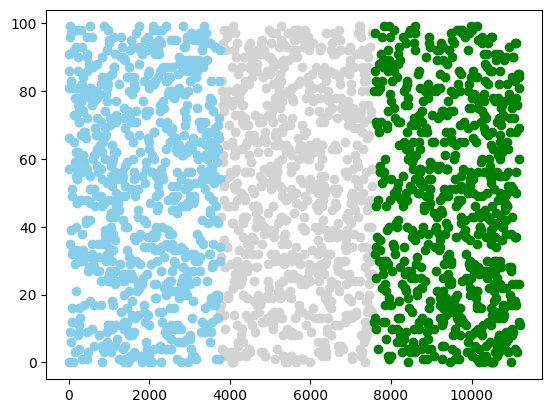

In [68]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], color = 'lightgrey')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], color = 'green')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], color = 'skyblue')

In [69]:
data["label"] = y_means
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,label
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,0


In [70]:
data_new = data
X = data_new.iloc[:, 1 : 5] # [1, 2, 3, 4]
y = data_new.iloc[:, -1] # -1 - eng oxirgi element (ustun)
X[:10]

,Year_Birth,Education,Marital_Status,Income
0,1957,Graduation,Single,58138.0
1,1954,Graduation,Single,46344.0
2,1965,Graduation,Together,71613.0
3,1984,Graduation,Together,26646.0
4,1981,PhD,Married,58293.0
5,1967,Master,Together,62513.0
6,1971,Graduation,Divorced,55635.0
7,1985,PhD,Married,33454.0
8,1974,PhD,Together,30351.0
9,1950,PhD,Together,5648.0


In [71]:
y[:10]

0    0
1    2
2    0
3    0
4    0
5    0
6    2
7    0
8    0
9    0
Name: label, dtype: int32

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

lab = LabelEncoder()
print(f"Education - {X['Education']}")
X["Education"] = lab.fit_transform(X["Education"])
print(f"After - {X['Education']}")

Education - 0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2240, dtype: object
After - 0       2
1       2
2       2
3       2
4       4
       ..
2235    2
2236    4
2237    2
2238    3
2239    4
Name: Education, Length: 2240, dtype: int32


In [73]:


lab = LabelEncoder()
print(f"Marital_Status - {X['Marital_Status']}")
X["Marital_Status"] = lab.fit_transform(X["Marital_Status"])
print(f"After - {X['Marital_Status']}")

Marital_Status - 0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2240, dtype: object
After - 0       4
1       4
2       5
3       5
4       3
       ..
2235    3
2236    5
2237    2
2238    5
2239    3
Name: Marital_Status, Length: 2240, dtype: int32


In [74]:
X_test_all, X_train, y_test_all, y_train = train_test_split(X, y, test_size = 0.8)
X_test_all, X_validation, y_test_all, y_validation = train_test_split(X, y, test_size = 0.1)
X_test_all, X_test, y_test_all, y_test = train_test_split(X, y, test_size = 0.1)
print(len(X_train))
print(len(X_validation))
print(len(X_test))

1792
224
224


In [75]:
X_train_encoded = pd.get_dummies(X_train)

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

classifier = GradientBoostingClassifier(n_estimators=10000)
classifier.fit(X_train_imputed, y_train)

GradientBoostingClassifier(n_estimators=10000)

In [89]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score


X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
bashoratlar = classifier.predict(X_test_imputed)
acc = accuracy_score(y_true=y_test, y_pred=bashoratlar)
print(f"Modelning aniqlilik bahosi -> {acc:.3f}")

Modelning aniqlilik bahosi -> 0.817
